In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [48]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# This depends on the no of firms in the market - these are 10 sunset like colors 
colors = ["#8B0000", "#FF6B48", "#FFC0CB", "#FFD268", "#E6E6FA", "#9400D3", "#FF8C71", "#CC4BFF", "#FF00FF", "#FF67C2"]


In [49]:
df= pd.read_csv('../data/market_integrates_1.csv')
print(df)


     market_ids  firm_ids  characteristic1  characteristic2  prices  \
0             1         1           3.9886           3.9590  2.6830   
1             1         2           5.3197           3.9794  2.3276   
2             1         3           4.3421           4.8353  2.3249   
3             1         4           5.4053           4.3020  2.2693   
4             1         5           3.5868           4.7461  2.5173   
..          ...       ...              ...              ...     ...   
995         100         6           3.1031           5.5209  2.5570   
996         100         7           5.8063           3.5535  2.4036   
997         100         8           4.8880           3.0123  2.5938   
998         100         9           4.4969           5.0254  2.2393   
999         100        10           3.4997           4.0284  2.6442   

     marginal_cost  shares  profits  markups  e_quantity  capital  investment  \
0           1.8965  0.0087   0.0069   1.4147      8.7408  10.0000 

df= pd.read_csv('../data/market_integrates_1.csv')
print(df)




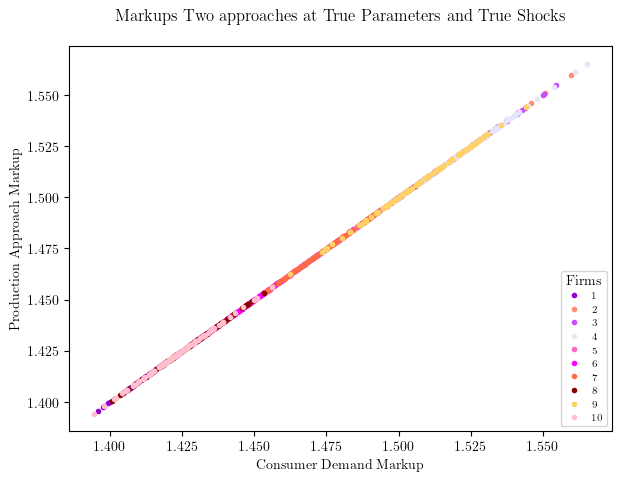

In [61]:
# Calculate markups_deloecker
# Average market price at around 1.45 lets say that that is kinda known so you can
markups_deloecker = (0.3 * df.prices * df.e_quantity) / (15 * df.labor)
df['markups_deloecker'] = markups_deloecker

# x45 = [1.5, 2.]
# y45 = [1.5, 2.]

groups = df.groupby('firm_ids')

# Define colors for each firm ID group

# Plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.margins(0.05)  # Optional, just adds 5% padding to the autoscaling

# Iterate over each group
for i, (name, group) in enumerate(groups):
    color = colors[i % len(colors)]  # Assign color based on index
    
    # Plot the scatter points for the group with the assigned color
    ax.plot(group.markups, group.markups_deloecker, marker='o', linestyle='', ms=3, label=name, c=color)

# Plot additional line (x=y)
# plt.plot(x45, y45, c='black', linestyle='--')

plt.title("Markups Two approaches at True Parameters and True Shocks \n")
plt.xlabel("Consumer Demand Markup")
plt.ylabel("Production Approach Markup")
plt.legend(
           fontsize='7',
           loc="lower right",
        #    bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
        #    shadow=True, 
        #    ncol=10,
        #    columnspacing=0.8, 
           title='Firms'
)
plt.show()


In [51]:
df['average_car'] = (df.characteristic1 + df.characteristic2)/2

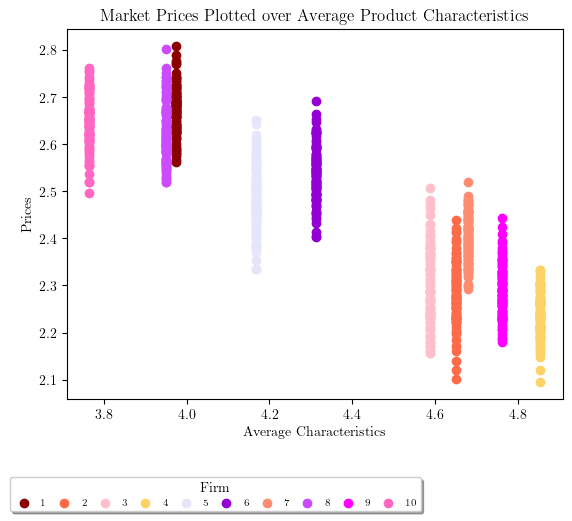

In [52]:
# Define the colors for each firm ID
colors = ["#8B0000", "#FF6B48", "#FFC0CB", "#FFD268", "#E6E6FA", "#9400D3", "#FF8C71", "#CC4BFF", "#FF00FF", "#FF67C2"]

# Group the dataframe by firm_ids
grouped_df_1 = df.groupby('firm_ids')

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_1.groups.keys(), colors):
    group = grouped_df_1.get_group(firm_id)
    plt.scatter(group.average_car, group.prices, c=color, label=firm_id)

# Set labels and show the plot
plt.title('Market Prices Plotted over Average Product Characteristics')
plt.xlabel('Average Characteristics')
plt.ylabel('Prices')
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)
plt.show()

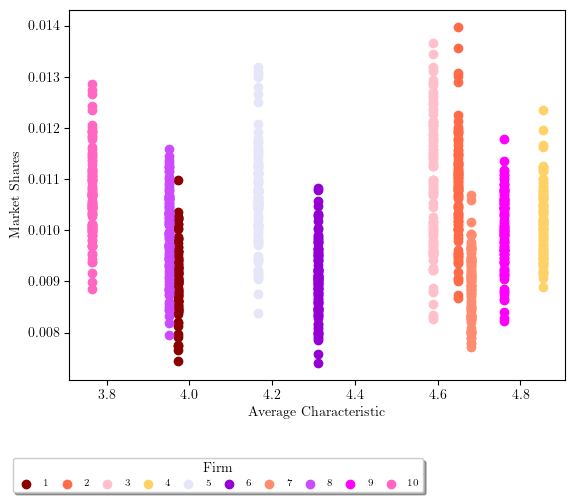

In [53]:

# Group the dataframe by firm_ids
grouped_df_2 = df.groupby('firm_ids')

# Create a scatter plot and assign colors based on firm_ids
for firm_id, color in zip(grouped_df_2.groups.keys(), colors):
    group = grouped_df_2.get_group(firm_id)
    plt.scatter(group.average_car, group.shares, c=color, label=firm_id)

# Set labels and show the plot
plt.xlabel('Average Characteristic')
plt.ylabel('Market Shares')
plt.legend(
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.3, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8, 
           title='Firm'
)
         
plt.show()

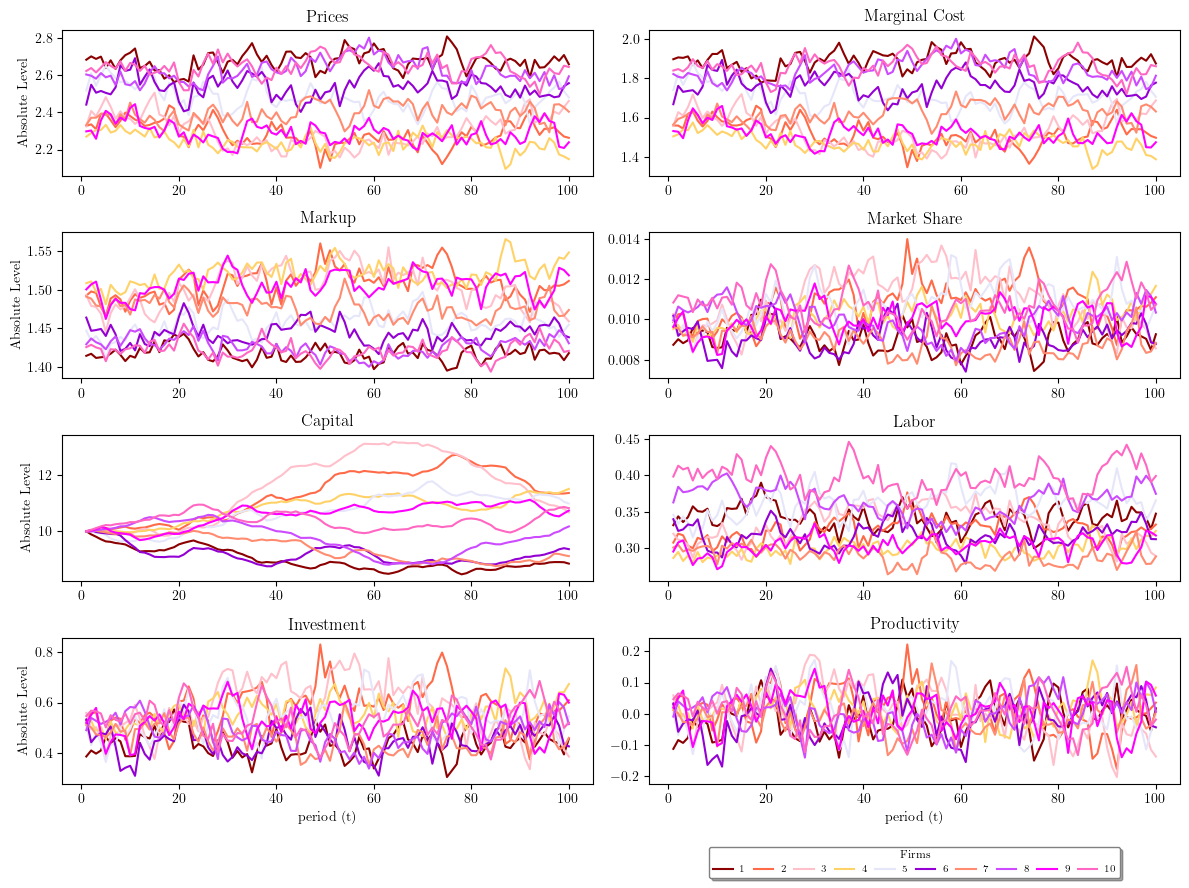

In [54]:
import matplotlib.pyplot as plt
import random

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(12, 9))

lines = []  # To store the lines for the legend

for i, firm in enumerate(df['firm_ids'].unique()):
    df_firm = df[df['firm_ids'] == firm]
    line1, = ax1.plot(df_firm.market_ids, df_firm.prices, color=colors[i])
    line2, = ax2.plot(df_firm.market_ids, df_firm.marginal_cost, color=colors[i])
    line3, = ax3.plot(df_firm.market_ids, df_firm.markups, color=colors[i])
    line4, = ax4.plot(df_firm.market_ids, df_firm.shares, color=colors[i])
    line5, = ax5.plot(df_firm.market_ids, df_firm.capital, color=colors[i])
    line6, = ax6.plot(df_firm.market_ids, df_firm.labor, color=colors[i])
    line7, = ax7.plot(df_firm.market_ids, df_firm.investment, color=colors[i])
    line8, = ax8.plot(df_firm.market_ids, df_firm.productivity, color=colors[i])
    
    lines.append(line1)  # Add the line to the legend list

ax1.set_title('Prices')
ax1.set_ylabel('Absolute Level')
ax2.set_title('Marginal Cost')
ax3.set_title('Markup')
ax3.set_ylabel('Absolute Level')
ax4.set_title('Market Share')
ax5.set_title('Capital')
ax5.set_ylabel('Absolute Level')

ax6.set_title('Labor')
ax7.set_title('Investment')
ax7.set_xlabel('period (t)')
ax7.set_ylabel('Absolute Level')

ax8.set_title('Productivity')
ax8.set_xlabel('period (t)')

# Creating the legend
legend_labels = df['firm_ids'].unique()
random.shuffle(colors)  # Randomize the order of colors for the legend
plt.legend(lines, legend_labels,
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.5, -0.4),
           fancybox=True,
           shadow=True,
           ncol=10,
           columnspacing=0.8,
           facecolor='white',
           edgecolor='gray',
           title="Firms",
           title_fontsize='8',
           labelspacing=0.5
)

plt.tight_layout()
plt.savefig('model_over_time.pdf')
plt.show()

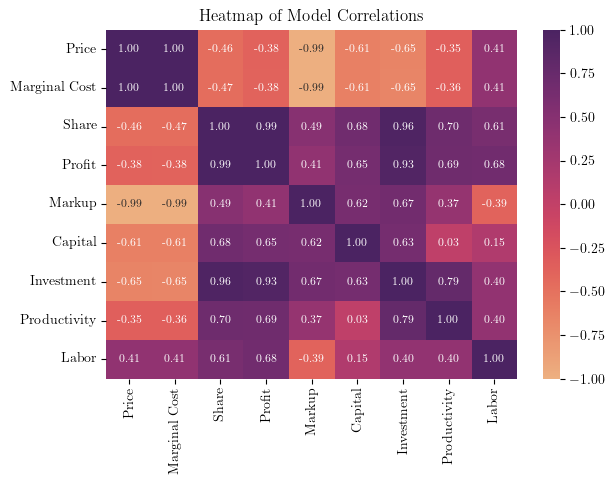

In [55]:
# heatmap_df = df.drop(['market_ids','firm_ids', 'characteristic1', 'characteristic2', 'e_quantity'], axis=1)
heatmap_df = df.drop(['market_ids','firm_ids', 'e_quantity', 'characteristic1', 'characteristic2', 'indirect_util', 'average_car', 'markups_deloecker'], axis=1)
labels = ['Price', 'Marginal Cost', 'Share', 'Profit', 'Markup', 'Capital', 'Investment', 'Productivity', 'Labor']
fig = sns.heatmap(heatmap_df.corr(), xticklabels=labels, yticklabels=labels,
                   vmin=-1., vmax=1., cmap="flare",
                     annot=True, fmt='.2f', annot_kws={"size":8})
plt.tight_layout() 
plt.title("Heatmap of Model Correlations")
plt.savefig('correlation_map_model.pdf')

In [56]:
# Create an empty string to store the LaTeX table content
pd.set_option('display.float_format', lambda x: '%.4f' % x)

latex_tables = ''

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    df_firm_drop = df_firm.drop(['market_ids','firm_ids', 'e_quantity', 'indirect_util', 'markups_deloecker', 'average_car'], axis=1)
    
    # Compute summary statistics per firm
    df_sum_stats = df_firm_drop.describe().loc[['mean', 'std', 'min', 'max']]
    
    # Convert summary statistics DataFrame to LaTeX table format
    latex_table = df_sum_stats.to_latex()

    # Add the firm's table to the overall LaTeX content
    latex_tables += f' \subsubsection*{{Firm {firm}}}\n'
    latex_tables += latex_table + '\n\n'

# Save the overall LaTeX content to a single file
with open('summary_tables.tex', 'w') as f:
    f.write(latex_tables)

/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_79217/4088497359.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_sum_stats.to_latex()
/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_79217/4088497359.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_sum_stats.to_latex()
/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_79217/4088497359.py:14: FutureWarning: In future versions `DataFrame.to_latex` is exp